In [1]:
from keras.datasets import imdb


Using TensorFlow backend.


In [2]:
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [3]:
print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

---review---
[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 2, 1117, 1831, 2, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


In [4]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])


---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', 'br', 'of', 'overly', 'to', 'descent', 'people', 'time', 

In [5]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))


Maximum review length: 2697


In [6]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Minimum review length: 14


In [25]:
from keras.preprocessing import sequence
max_words = 500

X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


In [26]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])


In [28]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)


Train on 24936 samples, validate on 64 samples
Epoch 1/3
24936/24936 [==============================] - 320s 13ms/step - loss: 0.4369 - acc: 0.7889 - val_loss: 0.3687 - val_acc: 0.8438
Epoch 2/3
24936/24936 [==============================] - 329s 13ms/step - loss: 0.3385 - acc: 0.8613 - val_loss: 0.2635 - val_acc: 0.9219
Epoch 3/3
24936/24936 [==============================] - 321s 13ms/step - loss: 0.2842 - acc: 0.8887 - val_loss: 0.2669 - val_acc: 0.9062


In [29]:
scores = model.evaluate(X_valid, y_valid, verbose=0)
print('Test accuracy:', scores[1])


Test accuracy: 0.90625


In [33]:
y_pred=model.predict(X_valid)
y_pred

array([[0.8786812 ],
       [0.03774649],
       [0.0730983 ],
       [0.58921397],
       [0.06313589],
       [0.2561823 ],
       [0.927266  ],
       [0.04097906],
       [0.97626746],
       [0.13244966],
       [0.99817324],
       [0.02568898],
       [0.09195542],
       [0.01681042],
       [0.10803688],
       [0.1371311 ],
       [0.98498195],
       [0.03867006],
       [0.05167058],
       [0.9751228 ],
       [0.01595435],
       [0.2784908 ],
       [0.63554823],
       [0.03562164],
       [0.89708734],
       [0.47775626],
       [0.17494753],
       [0.1917133 ],
       [0.2932494 ],
       [0.22382733],
       [0.03989646],
       [0.83713055],
       [0.6218158 ],
       [0.91362923],
       [0.03977203],
       [0.11145046],
       [0.10144171],
       [0.95048   ],
       [0.02918854],
       [0.0407697 ],
       [0.29062274],
       [0.06951901],
       [0.1154106 ],
       [0.11528704],
       [0.944296  ],
       [0.5797611 ],
       [0.959875  ],
       [0.963

In [42]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

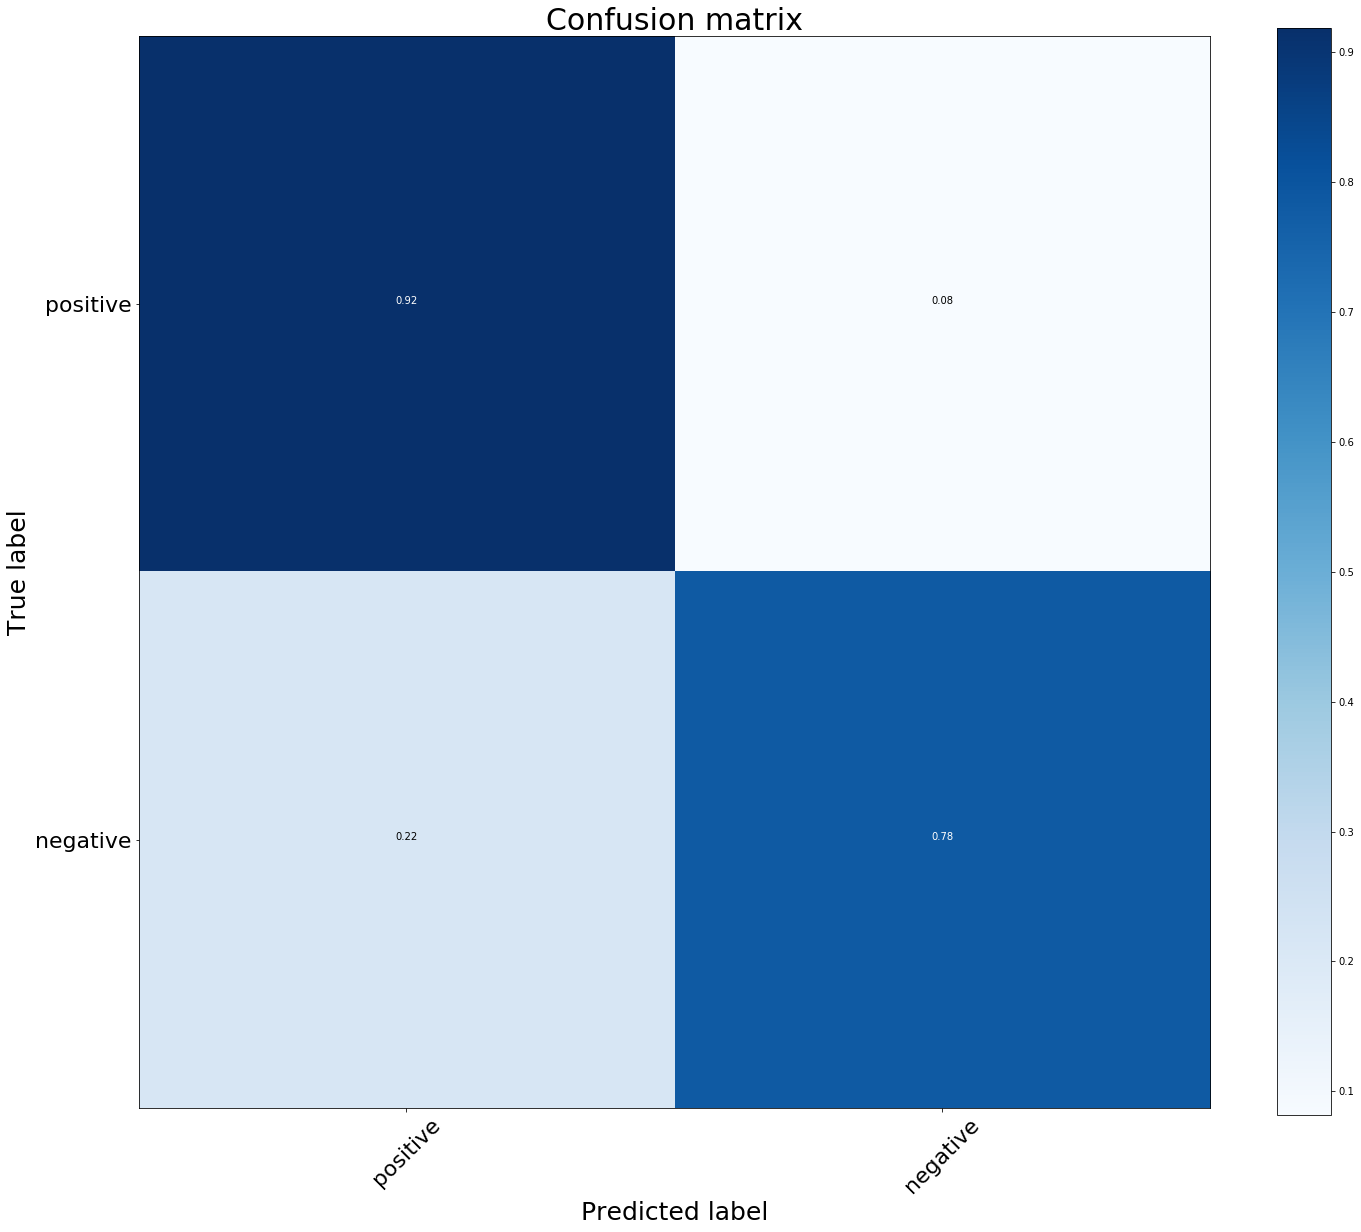

In [43]:
cnf_matrix = confusion_matrix(y_test,y_valid.round())
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=['positive','negative'], title="Confusion matrix")
plt.show()